# Viewing images with matplotlib and napari

let's begin where we left off, by reading a Tiff from disk.

`tifffile.imread` returns an object that is an instance of a `numpy.ndarray`.  It has a data type of `uint16` (i.e. it's a 16 bit monochromatic image), and it has a shape of `(7, 302, 302)` (that's ZYX).

In [16]:
from tifffile import imread

img = imread('data/mm_ex_w1488.TIF')
print(type(img), img.dtype, img.shape)

<class 'numpy.ndarray'> uint16 (7, 302, 302)


`matplotlib` provides image viewing functionality with the `imshow` function

TypeError: Invalid shape (7, 302, 302) for image data

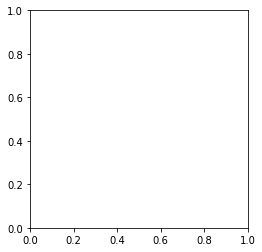

In [17]:
import matplotlib.pyplot as plt

plt.imshow(img)

uh oh!  looks like it doesn't like our Z-stack... so we'll need to extract a single plane from the 3D volume

we can do that by "indexing" into the numpy array:;

In [18]:
print('img.shape:', img.shape)
middle_plane = img[len(img)//2]
print('middle_plane.shape:', middle_plane.shape)

img.shape: (7, 302, 302)
middle_plane.shape: (302, 302)


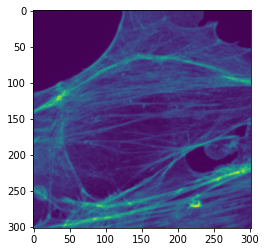

In [19]:
plt.imshow(middle_plane)

## adjusting image display options

[imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) takes a ton of options to customize display of the image

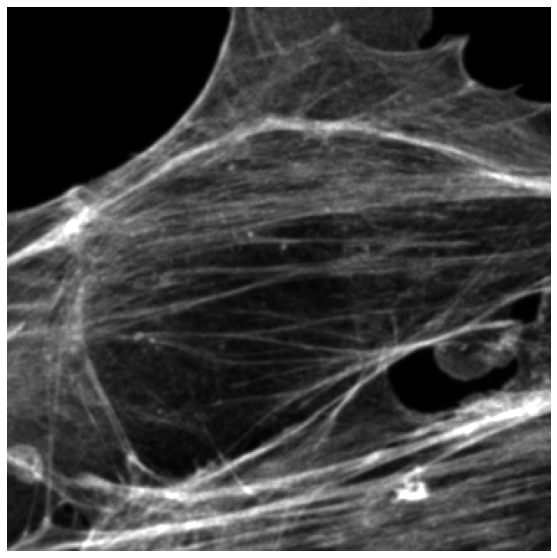

In [20]:
plt.figure(figsize=(10, 10))  # increase image size
plt.imshow(middle_plane, cmap='gray', vmin=110, vmax=1600) # colormap and contrast limits
plt.axis('off');  # remove axes

## viewing n-dimensional data with napari

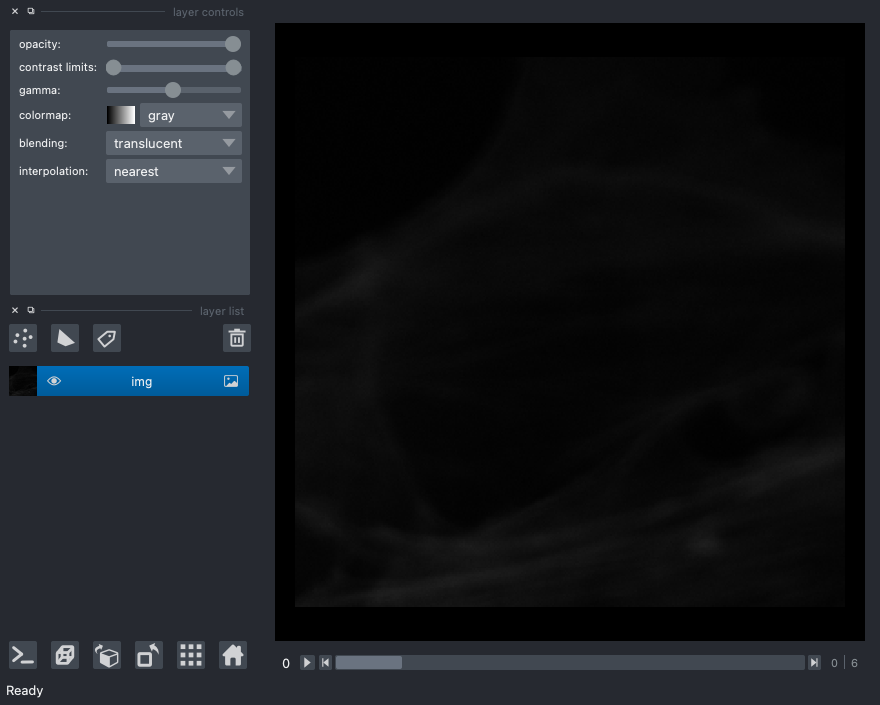

In [21]:
import napari
from napari.utils import nbscreenshot

viewer = napari.view_image(img)
nbscreenshot(viewer)  # this just shows the image in notebook.  the actual viewer will open in a new window.

### directly from file

`napari` also includes a built in reader that will load data directly from file (rather than needing to load it into a numpy array yourself). It can also be extended by installing various reader plugins that will provide support for proprietary file formats.  Let's open both the tiff files and the nikon nd2 file from path using napari (nd2 support provided by [`napari-nikon-nd2`](https://github.com/cwood1967/napari-nikon-nd2))

In [43]:
# create a napari viewer, passing a tiff file to read
viewer = napari.view_path('data/mm_ex_w1488.TIF')

In [44]:
viewer.layers.clear()  # clear the viewer

# open all of the files ending in 'TIF' in the data directory
# `channel_axis=0` will split the two channels in
viewer.open('data/*.TIF', channel_axis=0, name=['mito', 'actin'])

[<Image layer 'mito' at 0x16fa49eb0>, <Image layer 'actin' at 0x16d83bdf0>]

### drag and drop, and reader plugins

You can also drag and drop files onto the napari viewer to open them.

Create a new empty viewer (below), then try dragging and dropping the `elements_ex.nd2` file into the viewer.  You should get an error:




In [47]:
viewer = napari.Viewer()

PluginError: Error in plugin 'builtins', hook 'napari_get_reader'
  Cause was: ValueError('Could not find a format to read the specified file in single-image mode')
    in file: /Users/talley/miniconda3/envs/imgproc/lib/python3.9/site-packages/imageio/core/functions.py
    at line: 181
     author: napari team
      email: napari-steering-council@googlegroups.com
    package: napari
        url: https://napari.org
    version: 0.4.10



From the `Plugins` menu, select `Install/Uninstall Packages`.  In the dialog that opens, find the `napari-nikon-nd2` plugin and click "install".  Then close the dialog and try it again!

Note: you can also install plugins from the command line with pip as usual

```shell
pip install napari-nikon-nd2
```

... in addition to drag and drop, loading using `napari.view_path` and `viewer.open` should also work with an nd2 path now that the plugin is installed

In [48]:
viewer = napari.view_path('data/elements_ex.nd2')